# Exploratory Data Analysis (EDA)

This notebook is responsible for Exploring Data to Understand the behaviour of the data and get insight information from the data through text analysis. The notebook is organized based on the Questions.

#### **Question 1 : Data handling**

1. Data Loading
2. Preprocessing the data to sanitize the data
3. EDA viusualizations

Import Necessary Libraries

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

**Data Loading**

In [2]:
train_path = Path("../ML Engineer/train.csv")
test_path = Path("../ML Engineer/test.csv")
submission_path = Path("../ML Engineer/sample_submission.csv")

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
submission_data = pd.read_csv(submission_path)

train_data.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam


**Data Preprocessing**

In [3]:
# Shape of the data
print(f"Train data shape: {train_data.shape}\n"\
      f"Test data shape: {test_data.shape}\n"\
      f"submission data shape: {submission_data.shape}")

Train data shape: (15000, 4)
Test data shape: (13544, 3)
submission data shape: (13544, 2)


**Checking the dataset is imbalanced or not**

The class distribution is close to each other, so the dataset is not imbalanced.

class
spam        8254
not_spam    6746
Name: count, dtype: int64





C:\Users\abdullah\AppData\Local\Temp\ipykernel_14500\2706665228.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=train_data,palette="pastel")


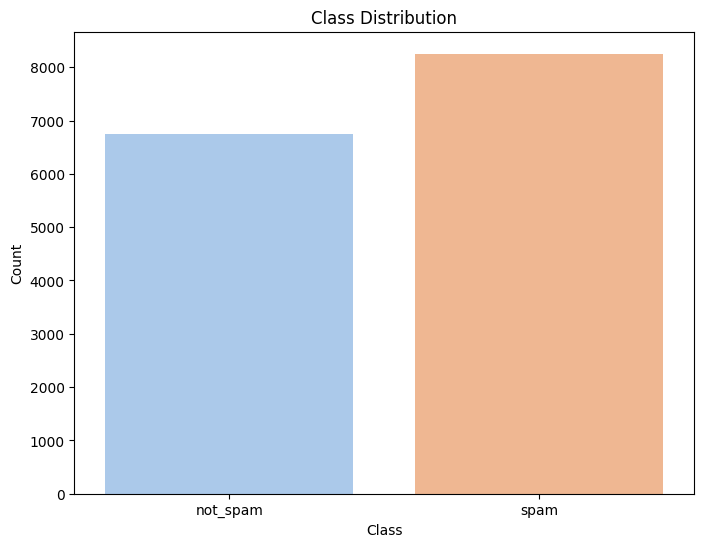

In [4]:
print(train_data['class'].value_counts())
print("\n\n")


# Assuming there's a 'label' column for classification
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=train_data,palette="pastel")
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Handling Missing Values: There has no missing values.

In [5]:
print(f"Train data: \n{train_data.isnull().sum()}\n")
print(f"Test data: \n{test_data.isnull().sum()}\n")
print(f"Submission data: \n{submission_data.isnull().sum()}\n")

Train data: 
id_       0
source    0
email     0
class     0
dtype: int64

Test data: 
id_       0
source    0
email     0
dtype: int64

Submission data: 
id_      0
class    0
dtype: int64



In [6]:
# Uniques values of source variable
train_data.source.unique(), test_data.source.unique()

(array([2, 4, 6, 5, 3], dtype=int64), array([5, 4, 2, 6, 3], dtype=int64))

Convert the class attributes into numerical values in a target variable

In [11]:
df = train_data.copy()

encoder = LabelEncoder()

# Fit and transform the labels to numeric values
df['target'] = encoder.fit_transform(df['class'])
df.head()

,id_,source,email,class,target
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam,0
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam,1
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam,1
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam,0
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam,1


Remove the duplicate rows if exists

In [12]:
df = df.drop_duplicates()
df.shape

(15000, 5)

**Data Cleaning**

* convert into lowercase
* replace currency symbols into 'currency'
* remove all the punctuations
* remove html tagging
* removing underscore
* removing any character that is not word, number and underscore.
* removing whitespaces, numbers, extra white spaces
* remove stopwords
* performing lemmatization

This functions are applied to clean the task. then the sanitize text are saved into clean_text variable of the dataframe.

In [13]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
currency_symbols = r'[\$\£\€\¥\₹\¢\₽\₩\₪]'

def clean_text(text):
    text = text.lower()
    # Replace all currency symbols with 'currency'
    text = re.sub(currency_symbols, 'currency', text)
    text = remove_punctuation(text)
    text=re.compile('<.*?>').sub('', text) 
    text = text.replace('_', '')
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    text = ' '.join(word for word in text.split() if word not in stop_words)
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    return text


df['clean_text'] = df['email'].apply(lambda x: clean_text(x))
df.head()

,id_,source,email,class,target,clean_text
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam,0,subject supply rebound beginning update cera o...
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam,1,subject email list million address currency ja...
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam,1,subject alley dodecahedra suicide ready lomse ...
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam,0,subject ibuyit project wanted share great news...
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam,1,subject cheap vicodin online u fda pharmacy hy...


The relation between source variable and target variable:  It indicates a moderate positive relationship, where an increase in one source variable is associated with an increase in the target variable, but the relationship is not particularly strong.

In [14]:
# Calculate the Pearson correlation between X and Y
correlation = df['source'].corr(df['target'])
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: 0.41320311142508287


Statistical Analysis of Text Length: It covers the emails length of training data where most of the emails are below 1000 words. But some emails contains more than 100000 words. The minimum value of the email is 7 valued those emails only contain "subject" word.

Statistical Analysis of Text Length :
 count     15000.000000
mean       1052.368133
std        2853.066449
min           7.000000
25%         243.000000
50%         480.000000
75%        1068.000000
max      111154.000000
Name: text_length, dtype: float64



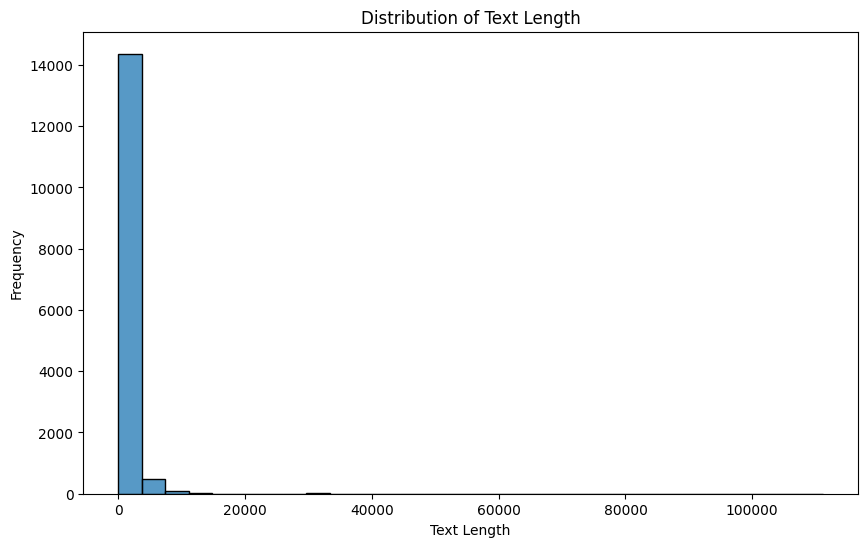

In [18]:
df['text_length'] = df['clean_text'].apply(len)

print(f"Statistical Analysis of Text Length :\n {df['text_length'].describe()}\n")

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=False)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

It doesnot contain a good relationship between the text length of emails and target value. But If the emails become too much long then it is possible to be not spam and if the emails are empty or just 'subject' word, then the emails are respose to spam mail.

In [31]:
# Calculate the Pearson correlation between X and Y
correlation = df['text_length'].corr(df['target'])
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: -0.05673326086531994


Distribution of Spam and Not spam text length: First I separate the spam and non spam rows into two dataframe. Then ploted the Distribution of Text length in respect to frequency, sothat it can understandable the comparison of spam and non spam emails text length.

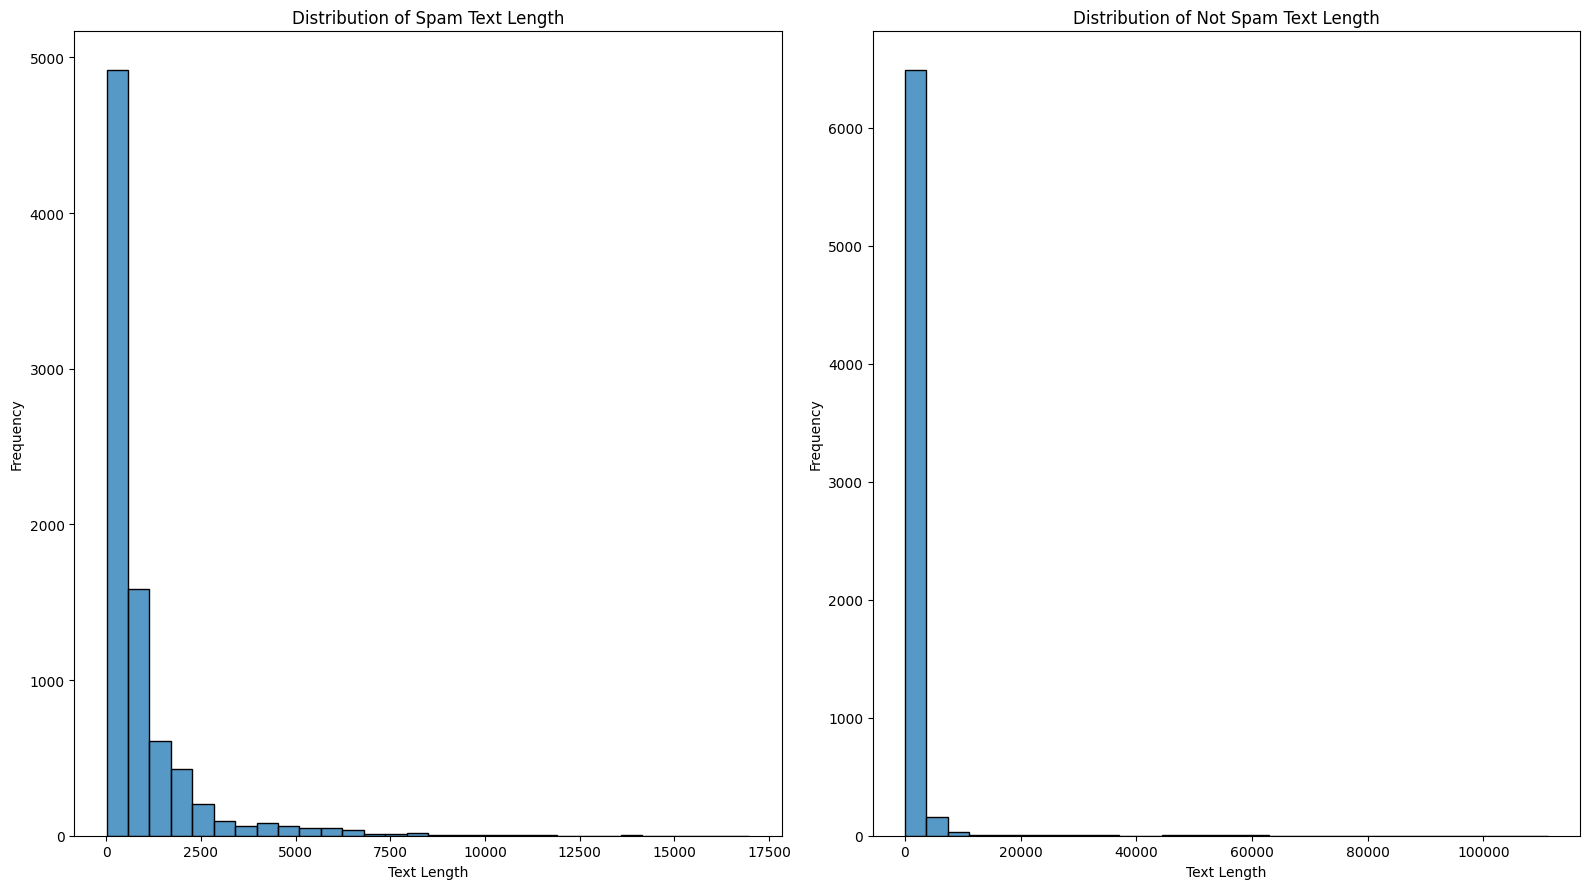

In [22]:
spam_df = df[df['target']==1]
not_spam_df = df[df['target']==0]

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

# Plot text length distribution on the first subplot
sns.histplot(spam_df['text_length'], bins=30, kde=False, ax=ax[0])
ax[0].set_title('Distribution of Spam Text Length')
ax[0].set_xlabel('Text Length')
ax[0].set_ylabel('Frequency')


# Plot text length distribution on the first subplot
sns.histplot(not_spam_df['text_length'], bins=30, kde=False, ax=ax[1])
ax[1].set_title('Distribution of Not Spam Text Length')
ax[1].set_xlabel('Text Length')
ax[1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

The standard deviation, max length, mean of Spam Emails are low than Non Spam Emails. If the length is higher, then it is more likely to become the Non spam emails.

In [23]:
print(f"Text Length Analysis of Spam Emails : \n\n{spam_df['text_length'].describe()}\n")
print(f"Text Length Analysis of Non Spam Emails : \n\n{not_spam_df['text_length'].describe()}")

Text Length Analysis of Spam Emails : 

count     8254.000000
mean       906.040586
std       1312.867250
min          7.000000
25%        243.000000
50%        446.000000
75%        937.500000
max      16984.000000
Name: text_length, dtype: float64

Text Length Analysis of Non Spam Emails : 

count      6746.000000
mean       1231.405722
std        3991.719954
min          11.000000
25%         243.250000
50%         559.000000
75%        1158.000000
max      111154.000000
Name: text_length, dtype: float64


Here I have shown the most 20 common words in in the spam emails as well as non spam emails for comparison. The graph shows the difference is clear of top common words between spam and non spam emails.

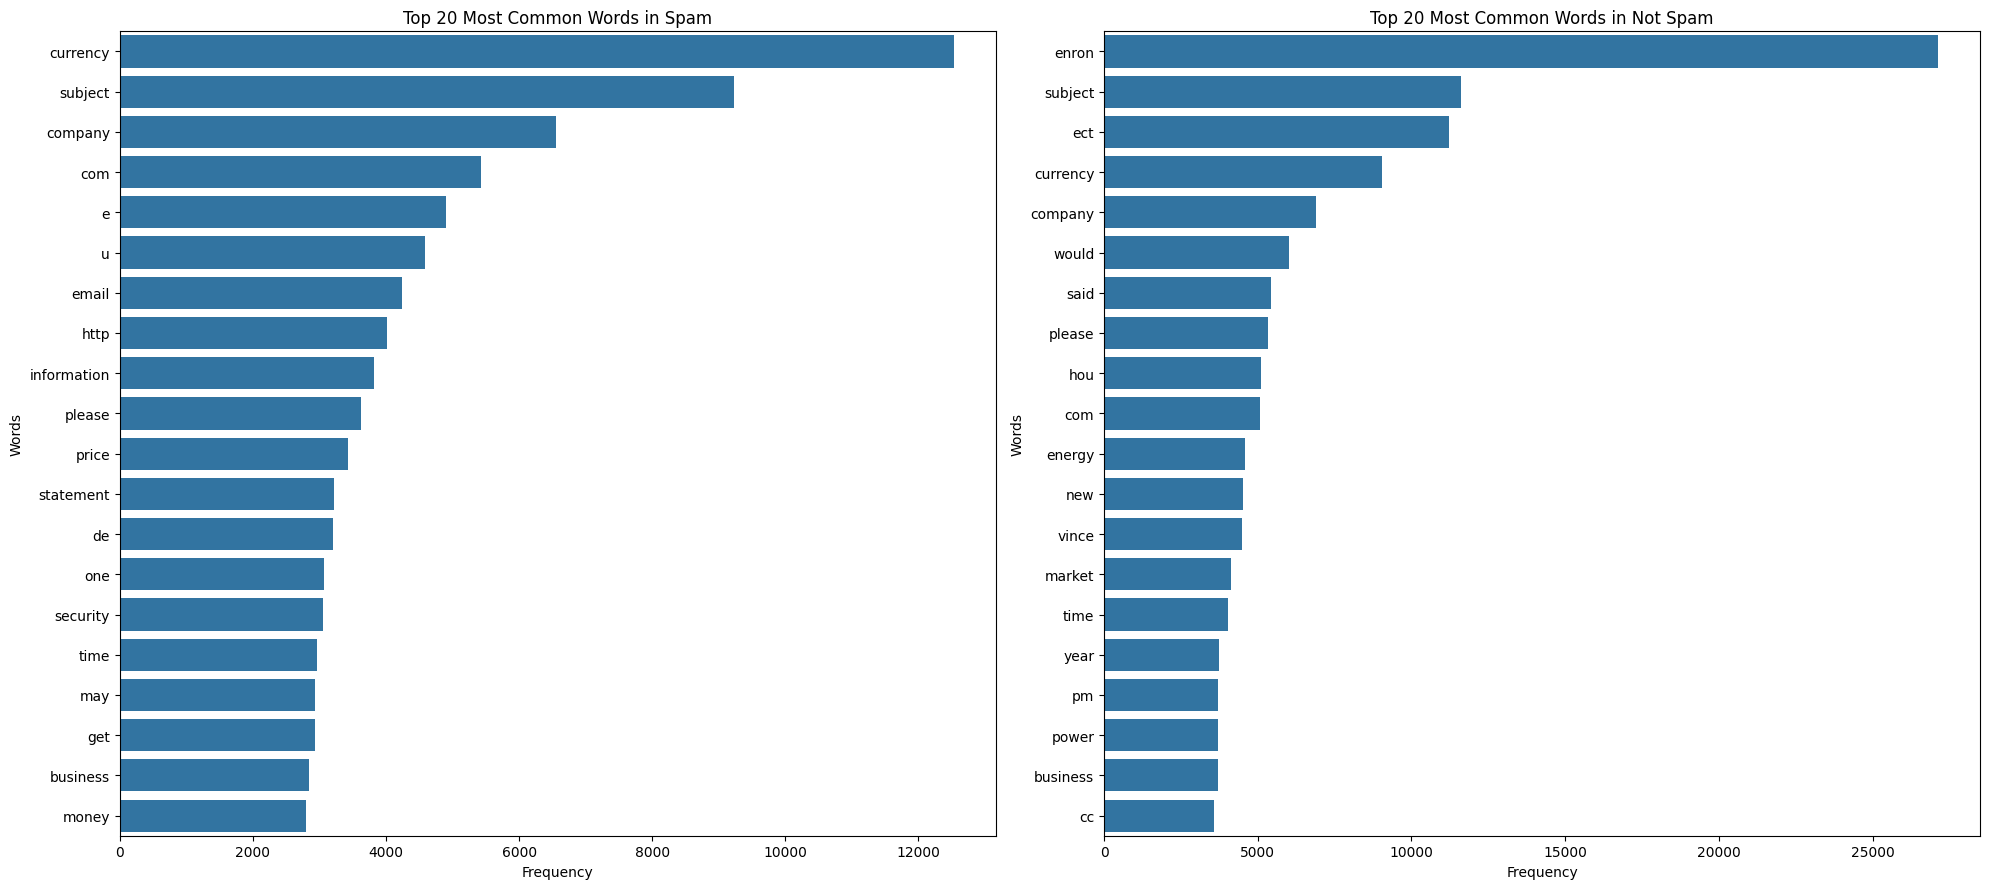

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Tokenize and count words in spam messages
spam_all_words = [word for tokens in spam_df['clean_text'].str.split() for word in tokens]
spam_word_freq = Counter(spam_all_words)
spam_common_words = spam_word_freq.most_common(20)

# Tokenize and count words in not spam messages
not_spam_all_words = [word for tokens in not_spam_df['clean_text'].str.split() for word in tokens]
not_spam_word_freq = Counter(not_spam_all_words)
not_spam_common_words = not_spam_word_freq.most_common(20)

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 9))

# Plot the most common words in spam messages
spam_words, spam_counts = zip(*spam_common_words)
sns.barplot(x=list(spam_counts), y=list(spam_words), ax=ax[0])
ax[0].set_title('Top 20 Most Common Words in Spam')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Words')

# Plot the most common words in not spam messages
not_spam_words, not_spam_counts = zip(*not_spam_common_words)
sns.barplot(x=list(not_spam_counts), y=list(not_spam_words), ax=ax[1])
ax[1].set_title('Top 20 Most Common Words in Not Spam')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Words')

# Adjust the layout
plt.tight_layout()
plt.show()


For more understanding, this is the wordcloud visualization of Spam Emails. Most common words are in bigger format.

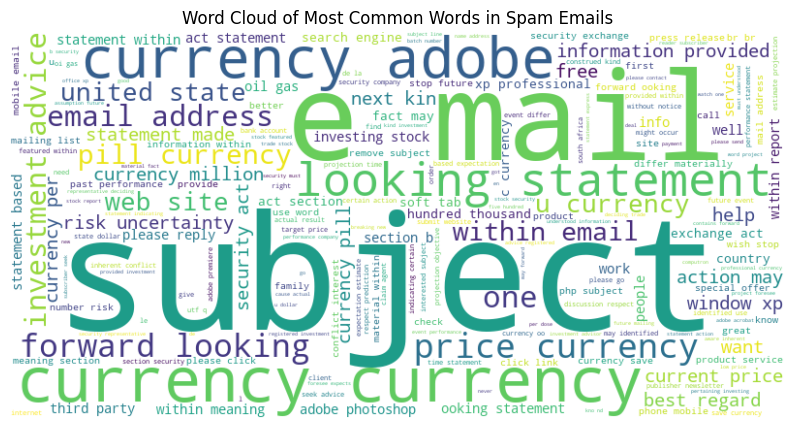

In [26]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_all_words))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Spam Emails')
plt.show()

This is the wordcloud visualization of Spam Emails.

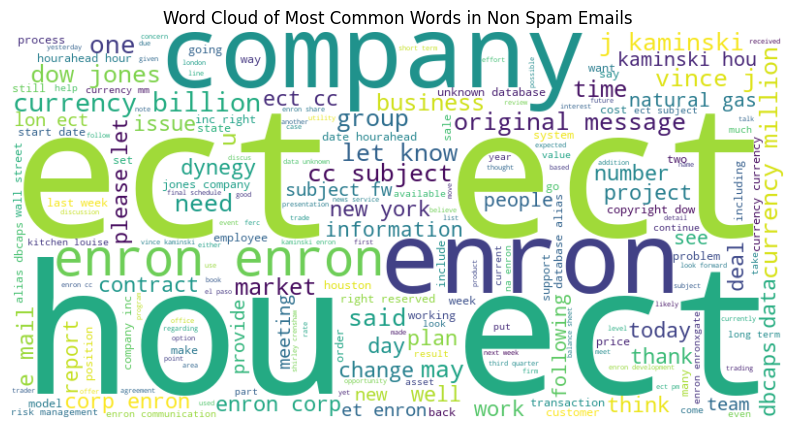

In [28]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(not_spam_all_words))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Non Spam Emails')
plt.show()

The below graph shows the most common of 2 words(bigrams) as 3 words(trigrams) in the training data.

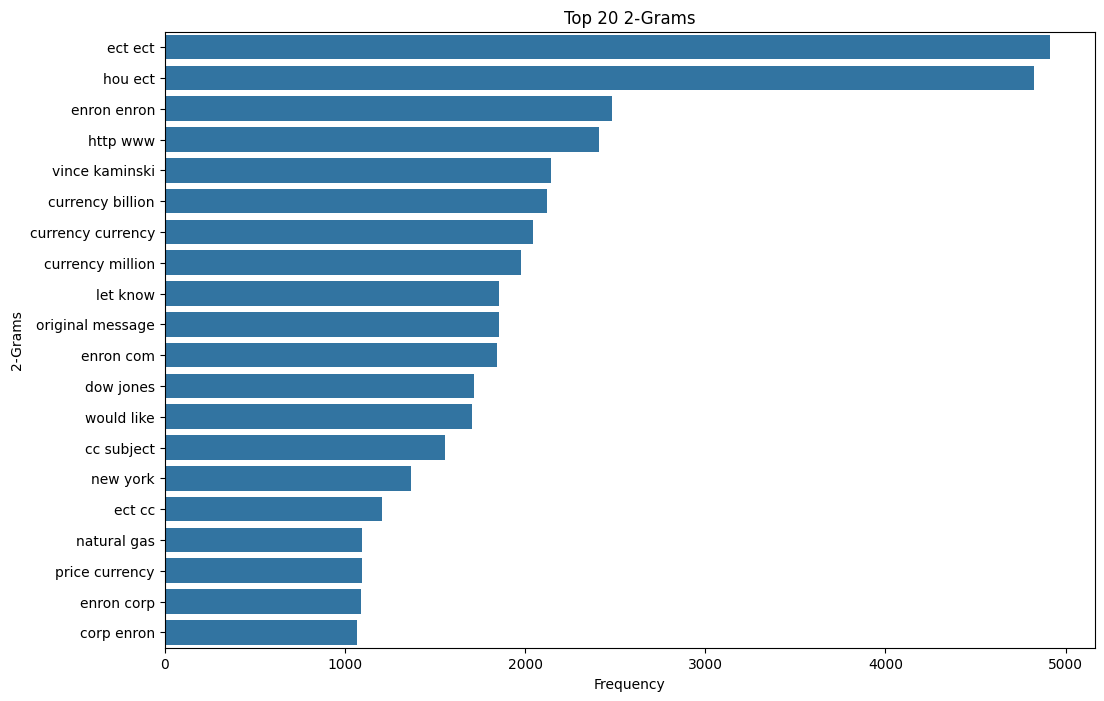

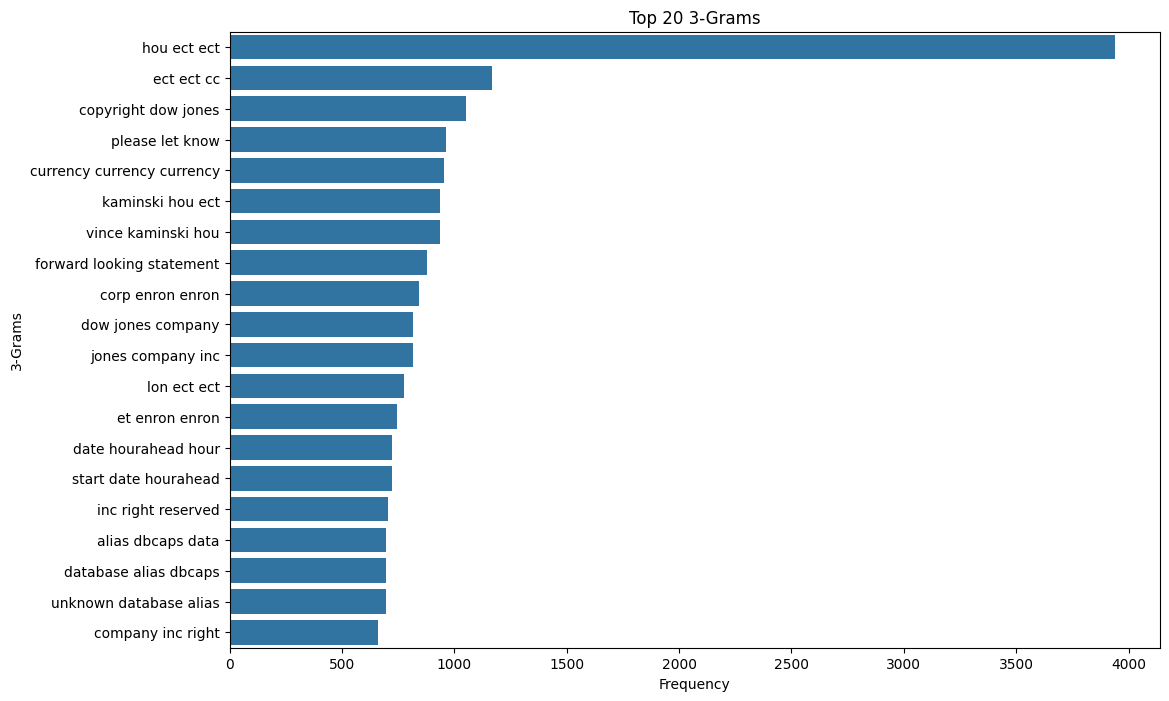

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(corpus, ngram_range=(2, 2), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=10000)
    X = vectorizer.fit_transform(corpus)
    ngrams = vectorizer.get_feature_names_out()
    ngram_counts = X.toarray().sum(axis=0)
    ngram_freq = dict(zip(ngrams, ngram_counts))
    sorted_ngram_freq = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    ngrams, counts = zip(*sorted_ngram_freq)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(ngrams))
    plt.title(f'Top {top_n} {ngram_range[1]}-Grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{ngram_range[1]}-Grams')
    plt.show()

plot_ngrams(df['clean_text'], ngram_range=(2, 2))  # For Bigrams
plot_ngrams(df['clean_text'], ngram_range=(3, 3))  # For Trigrams

This functions is responsible for ploting ngrams of common words in the spam as well as non spam emails together sothat it can be easy to compare Bigrams, Trigrams between spam and non spam emails.

In [36]:
def plot_ngrams(corpus1,corpus2, ngram_range=(2, 2), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=10000)
    X = vectorizer.fit_transform(corpus1)
    ngrams1 = vectorizer.get_feature_names_out()
    ngram_counts1 = X.toarray().sum(axis=0)
    ngram_freq1 = dict(zip(ngrams1, ngram_counts1))
    sorted_ngram_freq1 = sorted(ngram_freq1.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    ngrams1, counts1 = zip(*sorted_ngram_freq1)

    X = vectorizer.fit_transform(corpus2)
    ngrams2 = vectorizer.get_feature_names_out()
    ngram_counts2 = X.toarray().sum(axis=0)
    ngram_freq2 = dict(zip(ngrams2, ngram_counts2))
    sorted_ngram_freq2 = sorted(ngram_freq2.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    ngrams2, counts2 = zip(*sorted_ngram_freq2)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Plot the first barplot in the first subplot
    sns.barplot(x=list(counts1), y=list(ngrams1), ax=axes[0])
    axes[0].set_title(f'Top {top_n} {ngram_range[1]}-Grams of Spam Emails')
    axes[0].set_xlabel('Frequency')
    axes[0].set_ylabel(f'{ngram_range[1]}-Grams')

    # Plot the second barplot in the second subplot
    sns.barplot(x=list(counts2), y=list(ngrams2), ax=axes[1])
    axes[1].set_title(f'Top {top_n} {ngram_range[1]}-Grams of Non Spam Emails')
    axes[1].set_xlabel('Frequency')
    axes[1].set_ylabel(f'{ngram_range[1]}-Grams')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plots
    plt.show()

Bigrams of most common words in the Spam and non spam emails

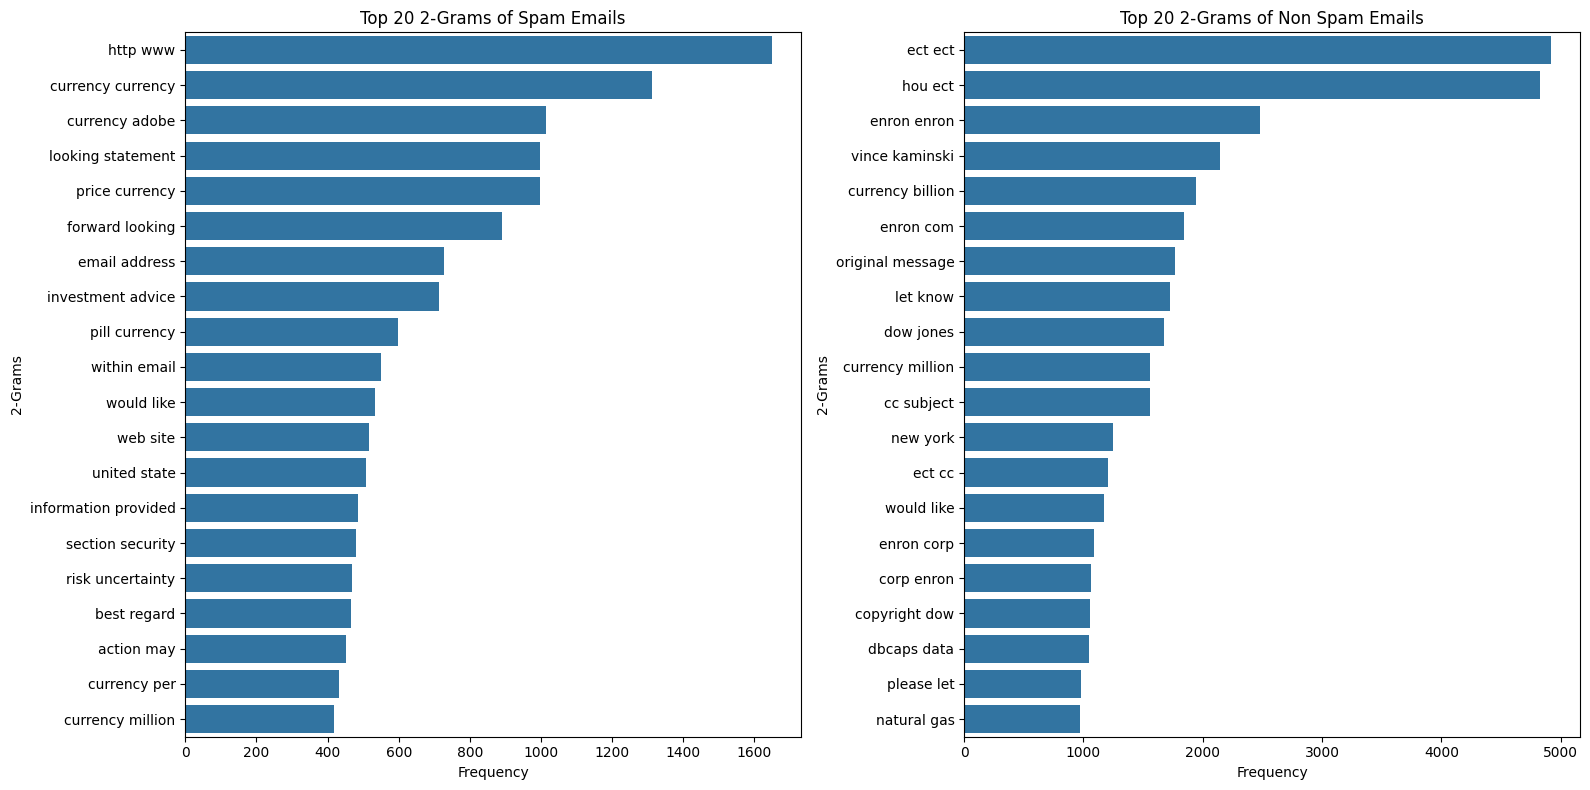

In [37]:
plot_ngrams(spam_df['clean_text'],not_spam_df['clean_text'], ngram_range=(2, 2), top_n=20)

Trigrams of most common words in the spam and non spam emails 

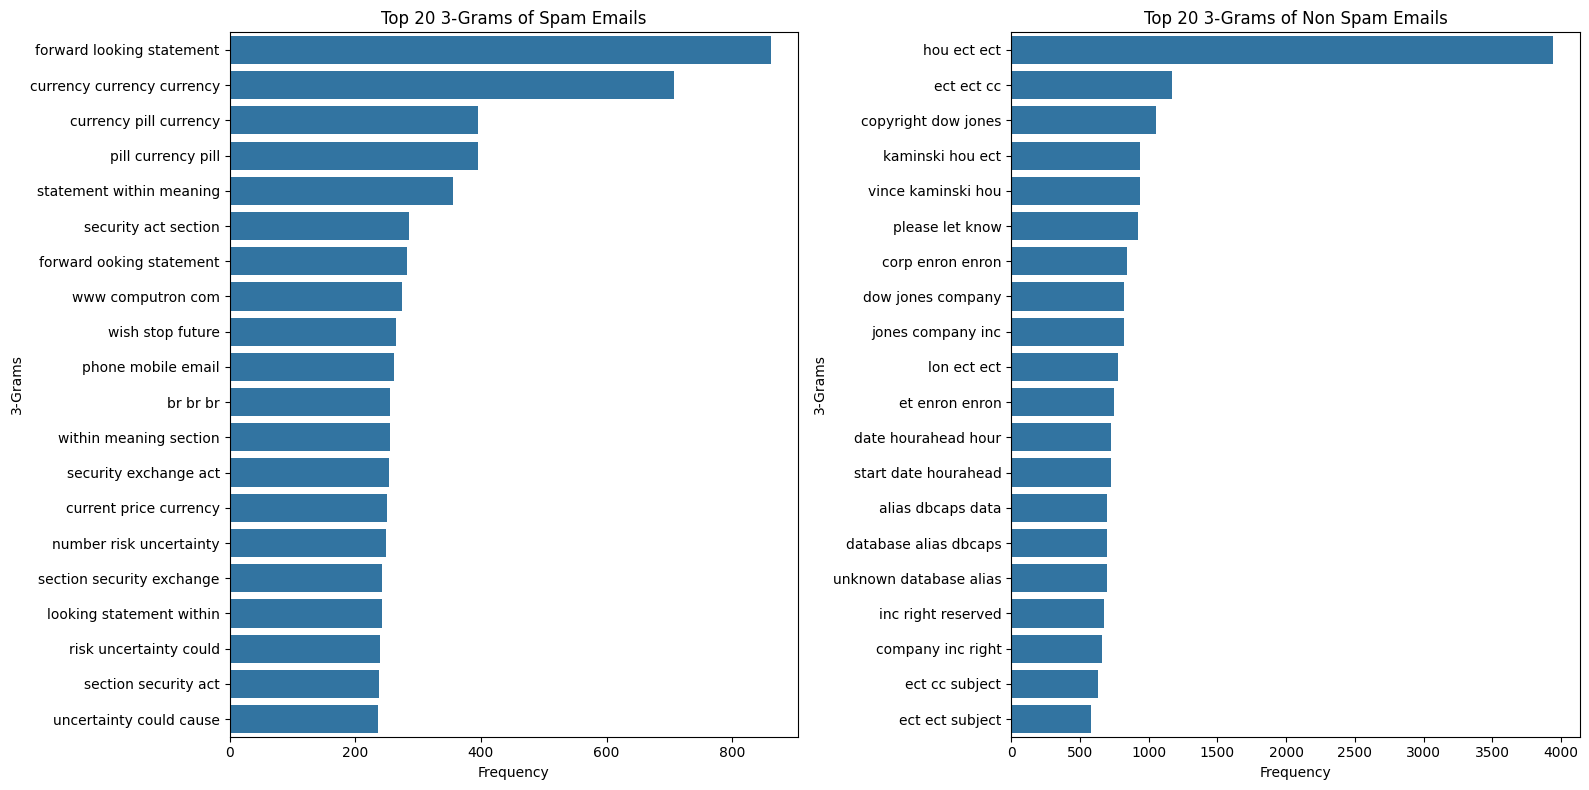

In [38]:
plot_ngrams(spam_df['clean_text'],not_spam_df['clean_text'], ngram_range=(3, 3), top_n=20)